In [1]:
import os
import numpy as np 
import pandas as pd
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
from pathlib import Path
import tensorflow_hub as hub    
# import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
%matplotlib inline

In [13]:
# !pip install opencv-python

     -------------------------------------- 38.2/38.2 MB 476.4 kB/s eta 0:00:00


In [2]:
strategy = tf.distribute.MirroredStrategy()
print("number of devices: {}".format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
number of devices: 1


In [7]:
# !pip install tensorflow_text
# !pip install tensorflow_hub

# import tensorflow_hub as hub    
# import tensorflow_text as text 

In [2]:
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13910733564862897202
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4850712576
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1746726400725800509
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [8]:
os.getcwd()

'C:\\Users\\dell g3'

In [9]:
print(tf.version.VERSION)

2.10.0


In [10]:
import sys
sys.version

'3.9.15 (main, Nov 24 2022, 14:39:17) [MSC v.1916 64 bit (AMD64)]'

In [7]:
print(os.getcwd())

C:\Users\dell g3


In [8]:
im_dir = 'C:/Users/dell g3/Downloads/PolypsSet/test2019/Image/1'
annot_dir = 'C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/1'


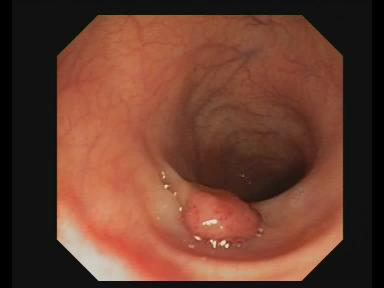

In [9]:
sample_img = Image.open('C:/Users/dell g3/Downloads/PolypsSet/test2019/Image/1/1.jpg')
sample_img

In [10]:
with open('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/1/1.xml') as annot_file:
    print(''.join(annot_file.readlines()))

<annotation>
    <folder>15</folder>
    <filename>1.png</filename>
    <path>/scratch/mfathan/Thesis/Dataset/Extracted/MICCAI2017_Test/test/15/1.png</path>
    <source>
        <database>Unknown</database>
    </source>
    <size>
        <width>384</width>
        <height>288</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>adenomatous</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>177</xmin>
            <ymin> 181</ymin>
            <xmax> 262</xmax>
            <ymax> 241</ymax>
        </bndbox>
    </object>
</annotation>



In [81]:
tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/1/1.xml')
root = tree.getroot()

sample_annotations = []

for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)
    
#     print(xmin, ymin, xmax, ymax)
    sample_annotations.append([xmin, ymin, xmax, ymax])
    
print(sample_annotations)

[]


[177, 181, 262, 241]


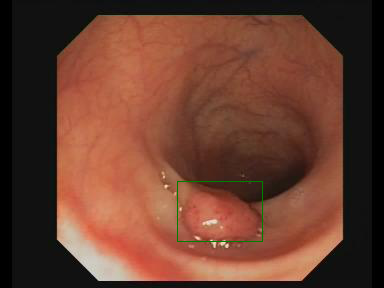

In [75]:
sample_image_annotated = sample_img.copy()

img_bbox = ImageDraw.Draw(sample_image_annotated)

for bbox in sample_annotations:
    print(bbox)
    img_bbox.rectangle(bbox, outline="green") 
    
sample_image_annotated

In [76]:
name_annot = []
for neighbor in root.iter('object'):
    name = neighbor.find('name').text
    name_annot.append(name)
print(name_annot)

['adenomatous']


In [2]:
x = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/1')
print(len(x))

543


In [3]:
# labels = []
# li = []
# for i in range(1, len(x)+1):
#     tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/1/{}.xml'.format(i))
#     root = tree.getroot()
#     for neighbor in root.iter('object'):
#         if neighbor.find('name').text in ['adenomatous', 'hyperplastic']:
#             li.append(i)
#             labels.append(name)
#         #name = neighbor.find('name').text

#         #labels.append(name)
#         #li.append(i)
# #print(labels)


NameError: name 'name' is not defined

# Data Cleaning (missing values in annotation files)

In [115]:
test1 = []
for i in range(1, len(x)+1):
    if i not in li:
        test1.append(i)


In [4]:
train = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation')
len(train)

27048

In [5]:
train_labels = []
train_empty = []
for i in train:
    
    tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation/{}'.format(i))
    root = tree.getroot()

        
    for neighbor in root.iter('object'):
        #if neighbor.find('name').text in ['adenomatous', 'hyperplastic']:
            #train_empty.append(i)
            #train_labels.append(name)
        name = neighbor.find('name').text
        train_labels.append(name)
#print(train_labels)
#print(len(train_empty))

In [7]:
print(len(train_labels))

27048


In [96]:
train1 = []
for i in range(1, len(train)+1):
    if i not in train_empty:
        train1.append(i)
train1

1725

In [59]:
tr_label_arr = np.array(train_labels)
len(tr_label_arr)

27048

In [98]:
# file_train = []
# for i in train1:
#     file_train.append('{}.xml'.format(i))
# location = 'C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation/'

# for file in file_train:
#     path = os.path.join(location, file) 

#     os.remove(path) 


In [99]:
# file_train = []
# for i in train1:
#     file_train.append('{}.jpg'.format(i))
# location = 'C:/Users/dell g3/Downloads/PolypsSet/train2019/Image/'

# for file in file_train:
#     path = os.path.join(location, file) 

#     os.remove(path) 

In [47]:

img_folder=r'C:\Users\dell g3\Downloads\PolypsSet\train2019\Image'

In [48]:
train_path = []
for file in os.listdir(img_folder):
        train_path.append(os.path.join(img_folder, file))

In [50]:
# train_path

In [20]:
training_data = []
for i in zip(train_path, train_labels):
    training_data.append(i)

In [53]:
adeno_file = []
hyper_file = []
for i, v in training_data:
    if v == 'adenomatous':
        adeno_file.append(i)
    else:
        hyper_file.append(i)


In [58]:
print(len(adeno_file))
print(len(hyper_file))
print(len(adeno_file) + len(hyper_file))

14269
12779
27048


In [69]:
# for file in adeno_file:
#     print(os.path.join(file))

In [68]:

# location = 'C:/Users/dell g3/Downloads/PolypsSet/train2019/adenomatous/'

# for file in adeno_file:
#     path = os.path.join(file) 

#     os.remove(path) 

In [24]:
target_dict = {k: v for v,k in enumerate(np.unique(train_labels))}
target_dict.update({'adenomatous': 1, 'hyperplastic': 0})
target_dict

{'adenomatous': 1, 'hyperplastic': 0}

In [29]:
target_labels = [target_dict[train_labels[i]] for i in range(len(train_labels))]


In [31]:
#for i in zip(train_labels, target_labels):
 #   print(i)

In [46]:
# def create_dataset_PIL(img_folder):
    
#     img_data_array=[]
#     for file in os.listdir(img_folder):
#         image_path = os.path.join(img_folder, file)
#         image= np.array(Image.open(image_path))
#         image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
#         image = image.astype('float32')
#         image /= 255  
#         img_data_array.append(image)
#     return img_data_array
# PIL_img_data =create_dataset_PIL(img_folder)

# validating and classifying images based on their annotation

In [81]:
x2 = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/val2019/Annotation/17')
print(len(x2))

184


In [82]:
labels = []
li = []
for i in range(1, len(x2)+1):
    tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/val2019/Annotation/17/{}.xml'.format(i))
    root = tree.getroot()
    for neighbor in root.iter('object'):
        #if neighbor.find('name').text in ['adenomatous', 'hyperplastic']:
         #   li.append(i)
          #  labels.append(name)
        name = neighbor.find('name').text

        labels.append(name)
        #li.append(i)
print(labels)

['adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomatous', 'adenomat

In [102]:
os.sys.path

['C:\\Users\\dell g3',
 'C:\\Users\\dell g3\\anaconda3\\python39.zip',
 'C:\\Users\\dell g3\\anaconda3\\DLLs',
 'C:\\Users\\dell g3\\anaconda3\\lib',
 'C:\\Users\\dell g3\\anaconda3',
 '',
 'C:\\Users\\dell g3\\anaconda3\\lib\\site-packages',
 'C:\\Users\\dell g3\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\dell g3\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\dell g3\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\dell g3\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\dell g3\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\dell g3\\.ipython']

In [105]:
!pip install opencv-python

In [32]:
dataset = []
dataset_path = 'C:/Users/dell g3/Downloads/PolypsSet/train2019/Image'
for file_name in os.listdir(dataset_path):
    image = cv2.imread(os.path.join(dataset_path, file_name))
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32')
    image /= 255.
    dataset.append(image)
dataset = np.array(dataset)
# final_train_data = zip(dataset, target_labels)
print(dataset.shape)

(27048, 224, 224, 3)


In [34]:
img = cv2.imread('C:/Users/dell g3/Downloads/PolypsSet/train2019/Image/4.jpg')
cv2.imshow('sample', img)
cv2.waitKey(0)

-1

In [44]:
# for i, example_image in enumerate(dataset.take(3)):
#   print("Image {} shape: {}".format(i+1, example_image[0].shape))
type(dataset)

numpy.ndarray

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

## Experiments in Classifying the dataset 

In [24]:
batch_size = 32
IMG_SHAPE = 150
base_dir = 'C:/Users/dell g3/Downloads/PolypsSet/train2019'
val_base_dir = 'C:/Users/dell g3/Downloads/PolypsSet/val2019/ImageVal'

In [25]:
train_dir = os.path.join(base_dir, 'Data_Splitted_Annot')
val_dir = os.path.join(val_base_dir, 'Images_Annot')

In [26]:
# image_gen_train = ImageDataGenerator(
#                     rescale=1./255
#                     rotation_range=45,
#                     width_shift_range=.15,
#                     height_shift_range=.15,
#                     horizontal_flip=True,
#                     zoom_range=0.5
#                     )


# train_data_gen = image_gen_train.flow_from_directory(
#                                                 batch_size=batch_size,
#                                                 directory=train_dir,
#                                                 shuffle=True,
#                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
#                                                 class_mode='binary'
#                                                 )

In [27]:
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

In [28]:
# image_gen_val = ImageDataGenerator(rescale=1./255)

# val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
#                                                  directory=val_dir,
#                                                  target_size=(IMG_SHAPE, IMG_SHAPE),
#                                                  class_mode='binary')

In [29]:
training_data = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                           labels = 'inferred',
                                                           label_mode='binary',
                                                           batch_size=batch_size,
                                                           image_size=(IMG_SHAPE, IMG_SHAPE),
                                                           shuffle=True,
                                                           color_mode='rgb')


Found 27047 files belonging to 2 classes.


In [30]:
val_data = tf.keras.utils.image_dataset_from_directory(directory = val_dir,
                                                           labels = 'inferred',
                                                           label_mode='binary',
                                                           batch_size=batch_size,
                                                           image_size=(IMG_SHAPE, IMG_SHAPE),
                                                           color_mode='rgb')

Found 4213 files belonging to 2 classes.


In [31]:
@tf.function
def map_fn(img, label):
    image_height = IMG_SHAPE
    image_width = IMG_SHAPE
    img = tf.image.resize(img, [image_height, image_width])
    img /= 255
    return img, label
device = '/gpu:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'

In [32]:
triann = training_data.map(map_fn)
vall = val_data.map(map_fn)

In [16]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [17]:
feature_extractor.trainable = False

In [18]:

EPOCHS = 2
with tf.device(device_name=device):
    
    model = keras.Sequential([feature_extractor, keras.layers.Dense(2)])

    model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
num_training_examples = 27048

train_batches = training_data.shuffle(num_training_examples//4).map(map_fn)
validation_batches = val_data.map(map_fn)

In [21]:
# model.compile(
#   optimizer='adam',
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#   metrics=['accuracy'])


# history = model.fit(train_data_gen,
#                     epochs=EPOCHS,
#                     validation_data=val_data_gen)

In [22]:
with tf.device(device_name=device):
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

#epochs = 10


In [23]:
EPOCHS = 6
with tf.device(device_name=device):
    history = model.fit(
        train_batches,
        epochs=EPOCHS,
        validation_data=validation_batches,
        )

Epoch 1/6
846/846 [==============================] - 152s 81ms/step - loss: 0.7135 - accuracy: 0.4762 - val_loss: 0.6931 - val_accuracy: 0.3947
Epoch 2/6
846/846 [==============================] - 131s 81ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.6931 - val_accuracy: 0.3947
Epoch 3/6
846/846 [==============================] - 113s 80ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.6931 - val_accuracy: 0.3947
Epoch 4/6
846/846 [==============================] - 109s 80ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.6931 - val_accuracy: 0.3947
Epoch 5/6
846/846 [==============================] - 111s 80ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.6931 - val_accuracy: 0.3947
Epoch 6/6
846/846 [==============================] - 109s 81ms/step - loss: 0.6931 - accuracy: 0.4752 - val_loss: 0.6931 - val_accuracy: 0.3947


In [37]:
IMAGE_RES = 299

URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    model_inception = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    model_inception.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [38]:
with tf.device(device_name=device):
    
    model_inception.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])


In [39]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = model_inception.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 528s 576ms/step - loss: 0.3914 - accuracy: 0.8260 - val_loss: 0.9461 - val_accuracy: 0.5301
Epoch 2/6
846/846 [==============================] - 515s 608ms/step - loss: 0.2681 - accuracy: 0.8997 - val_loss: 1.0812 - val_accuracy: 0.5331
Epoch 3/6
846/846 [==============================] - 245s 289ms/step - loss: 0.2291 - accuracy: 0.9152 - val_loss: 1.0827 - val_accuracy: 0.5411
Epoch 4/6
846/846 [==============================] - 251s 296ms/step - loss: 0.1978 - accuracy: 0.9300 - val_loss: 1.0785 - val_accuracy: 0.5550
Epoch 5/6
846/846 [==============================] - 251s 297ms/step - loss: 0.1829 - accuracy: 0.9368 - val_loss: 1.0968 - val_accuracy: 0.5628
Epoch 6/6
846/846 [==============================] - 252s 297ms/step - loss: 0.1677 - accuracy: 0.9414 - val_loss: 1.1491 - val_accuracy: 0.5562


In [19]:
url2 = 'https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1'
feature_extractor = hub.KerasLayer(url2,
  input_shape=(32, 32, 3),
  trainable=False)
with tf.device(device_name=device):
    
    model_covnet = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    model_covnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 10)                7796426   
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 7,796,448
Trainable params: 22
Non-trainable params: 7,796,426
_________________________________________________________________


In [20]:
with tf.device(device_name=device):
    
    model_covnet.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])


In [21]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = model_covnet.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6


ValueError: in user code:

    File "C:\Users\dell g3\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\dell g3\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dell g3\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\dell g3\anaconda3\envs\myenv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\dell g3\anaconda3\envs\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\dell g3\anaconda3\envs\myenv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 299, 299, 3)


In [79]:
from keras.applications.vgg19 import VGG19
VGG = VGG19(input_shape=[224, 224, 3], weights='imagenet', include_top=False)


In [80]:
for layer in VGG.layers:
  layer.trainable = False

In [87]:
with tf.device(device_name=device):

    x = tf.keras.layers.Flatten()(VGG.output) 
    prediction = tf.keras.layers.Dense(2)(x) 
    model_VGG = tf.keras.Model(inputs=VGG.input, outputs=prediction)
    model_VGG.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [88]:
with tf.device(device_name=device):
    
    model_VGG.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [89]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = model_VGG.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 220s 259ms/step - loss: 0.1759 - accuracy: 0.9407 - val_loss: 1.6243 - val_accuracy: 0.4471
Epoch 2/6
846/846 [==============================] - 212s 251ms/step - loss: 0.0386 - accuracy: 0.9913 - val_loss: 1.8852 - val_accuracy: 0.4633
Epoch 3/6
846/846 [==============================] - 283s 334ms/step - loss: 0.0233 - accuracy: 0.9947 - val_loss: 2.1611 - val_accuracy: 0.4718
Epoch 4/6
846/846 [==============================] - 581s 686ms/step - loss: 0.0171 - accuracy: 0.9960 - val_loss: 2.3115 - val_accuracy: 0.4925
Epoch 5/6
846/846 [==============================] - 582s 687ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 2.7982 - val_accuracy: 0.4415
Epoch 6/6
846/846 [==============================] - 582s 687ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 3.1780 - val_accuracy: 0.4229


In [49]:
IMAGE_RES = 224

URL = "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    model_inception1 = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    model_inception1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1024)              5607184   
                                                                 
 dense_3 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 5,609,234
Trainable params: 2,050
Non-trainable params: 5,607,184
_________________________________________________________________


In [50]:
with tf.device(device_name=device):
    
    model_inception1.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])


In [51]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = model_inception1.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 90s 100ms/step - loss: 0.4449 - accuracy: 0.7945 - val_loss: 0.8445 - val_accuracy: 0.5736
Epoch 2/6
846/846 [==============================] - 84s 99ms/step - loss: 0.3339 - accuracy: 0.8658 - val_loss: 0.8418 - val_accuracy: 0.5926
Epoch 3/6
846/846 [==============================] - 85s 100ms/step - loss: 0.2929 - accuracy: 0.8855 - val_loss: 0.8617 - val_accuracy: 0.5950
Epoch 4/6
846/846 [==============================] - 85s 100ms/step - loss: 0.2643 - accuracy: 0.9012 - val_loss: 0.8797 - val_accuracy: 0.5992
Epoch 5/6
846/846 [==============================] - 85s 100ms/step - loss: 0.2474 - accuracy: 0.9101 - val_loss: 0.9056 - val_accuracy: 0.5983
Epoch 6/6
846/846 [==============================] - 86s 101ms/step - loss: 0.2319 - accuracy: 0.9154 - val_loss: 0.9076 - val_accuracy: 0.6051


In [52]:
IMAGE_RES = 224

URL = "https://tfhub.dev/google/imagenet/inception_v2/feature_vector/5"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    model_inception2 = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    model_inception2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1024)              10173112  
                                                                 
 dense_4 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 10,175,162
Trainable params: 2,050
Non-trainable params: 10,173,112
_________________________________________________________________


In [53]:
with tf.device(device_name=device):
    
    model_inception2.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])


In [54]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = model_inception2.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 114s 128ms/step - loss: 0.4504 - accuracy: 0.7963 - val_loss: 0.8400 - val_accuracy: 0.5343
Epoch 2/6
846/846 [==============================] - 109s 128ms/step - loss: 0.3295 - accuracy: 0.8678 - val_loss: 0.9055 - val_accuracy: 0.5517
Epoch 3/6
846/846 [==============================] - 109s 128ms/step - loss: 0.2886 - accuracy: 0.8890 - val_loss: 0.8988 - val_accuracy: 0.5649
Epoch 4/6
846/846 [==============================] - 109s 128ms/step - loss: 0.2656 - accuracy: 0.8992 - val_loss: 0.9221 - val_accuracy: 0.5628
Epoch 5/6
846/846 [==============================] - 108s 128ms/step - loss: 0.2476 - accuracy: 0.9085 - val_loss: 0.9508 - val_accuracy: 0.5818
Epoch 6/6
846/846 [==============================] - 109s 128ms/step - loss: 0.2334 - accuracy: 0.9126 - val_loss: 0.9461 - val_accuracy: 0.5797


In [64]:
IMAGE_RES = 299

URL = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    model_inception3 = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    model_inception3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense_5 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [65]:
with tf.device(device_name=device):
    
    model_inception3.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [66]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = model_inception3.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 252s 290ms/step - loss: 0.3984 - accuracy: 0.8245 - val_loss: 1.0281 - val_accuracy: 0.5261
Epoch 2/6
846/846 [==============================] - 249s 294ms/step - loss: 0.2744 - accuracy: 0.8947 - val_loss: 0.9975 - val_accuracy: 0.5339
Epoch 3/6
846/846 [==============================] - 249s 294ms/step - loss: 0.2281 - accuracy: 0.9161 - val_loss: 1.0389 - val_accuracy: 0.5463
Epoch 4/6
846/846 [==============================] - 247s 292ms/step - loss: 0.2041 - accuracy: 0.9256 - val_loss: 1.1014 - val_accuracy: 0.5555
Epoch 5/6
846/846 [==============================] - 250s 296ms/step - loss: 0.1845 - accuracy: 0.9340 - val_loss: 1.1188 - val_accuracy: 0.5541
Epoch 6/6
846/846 [==============================] - 253s 298ms/step - loss: 0.1700 - accuracy: 0.9404 - val_loss: 1.1976 - val_accuracy: 0.5407


In [22]:
IMAGE_RES = 299

URL = "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/5"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    model_inceptionres = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    model_inceptionres.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1536)              54336736  
                                                                 
 dense_2 (Dense)             (None, 2)                 3074      
                                                                 
Total params: 54,339,810
Trainable params: 3,074
Non-trainable params: 54,336,736
_________________________________________________________________


In [23]:
with tf.device(device_name=device):
    
    model_inceptionres.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [24]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = model_inceptionres.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 926s 1s/step - loss: 0.4504 - accuracy: 0.7934 - val_loss: 0.7000 - val_accuracy: 0.6220
Epoch 2/6
846/846 [==============================] - 578s 683ms/step - loss: 0.3114 - accuracy: 0.8815 - val_loss: 0.7422 - val_accuracy: 0.6258
Epoch 3/6
846/846 [==============================] - 583s 689ms/step - loss: 0.2666 - accuracy: 0.9020 - val_loss: 0.7952 - val_accuracy: 0.6265
Epoch 4/6
846/846 [==============================] - 586s 692ms/step - loss: 0.2383 - accuracy: 0.9129 - val_loss: 0.8306 - val_accuracy: 0.6370
Epoch 5/6
846/846 [==============================] - 585s 691ms/step - loss: 0.2200 - accuracy: 0.9206 - val_loss: 0.8321 - val_accuracy: 0.6335
Epoch 6/6
846/846 [==============================] - 586s 692ms/step - loss: 0.2047 - accuracy: 0.9271 - val_loss: 0.8463 - val_accuracy: 0.6305


In [34]:

IMAGE_RES = 224

URL = 'https://tfhub.dev/google/edgetpu/vision/mobilenet-edgetpu-v2-feature-vector/l/2'
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    mobilenet = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    mobilenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1, 1, 1408)        9583872   
                                                                 
 dense_3 (Dense)             (None, 1, 1, 2)           2818      
                                                                 
Total params: 9,586,690
Trainable params: 2,818
Non-trainable params: 9,583,872
_________________________________________________________________


In [35]:
with tf.device(device_name=device):
    
    mobilenet.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [36]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = mobilenet.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 193s 214ms/step - loss: 0.3056 - accuracy: 0.5134 - val_loss: 1.0849 - val_accuracy: 0.5003
Epoch 2/6
846/846 [==============================] - 182s 215ms/step - loss: 0.1647 - accuracy: 0.5136 - val_loss: 1.1781 - val_accuracy: 0.5016
Epoch 3/6
846/846 [==============================] - 182s 215ms/step - loss: 0.1281 - accuracy: 0.5158 - val_loss: 1.2060 - val_accuracy: 0.5023
Epoch 4/6
846/846 [==============================] - 186s 220ms/step - loss: 0.1067 - accuracy: 0.5171 - val_loss: 1.2635 - val_accuracy: 0.5007
Epoch 5/6
846/846 [==============================] - 185s 218ms/step - loss: 0.0939 - accuracy: 0.5164 - val_loss: 1.2993 - val_accuracy: 0.4995
Epoch 6/6
846/846 [==============================] - 185s 218ms/step - loss: 0.0857 - accuracy: 0.5171 - val_loss: 1.3701 - val_accuracy: 0.5028


In [27]:
IMAGE_RES = 224

URL = 'https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5'
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    resnet = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              58331648  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 58,335,746
Trainable params: 4,098
Non-trainable params: 58,331,648
_________________________________________________________________


In [28]:
with tf.device(device_name=device):
    
    resnet.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [14]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = resnet.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

In [15]:
IMAGE_RES = 224

URL = 'https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5'
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    resnet = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23561152  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,565,250
Trainable params: 4,098
Non-trainable params: 23,561,152
_________________________________________________________________


In [16]:
with tf.device(device_name=device):
    
    resnet.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [17]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = resnet.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 379s 401ms/step - loss: 0.3081 - accuracy: 0.8722 - val_loss: 1.0166 - val_accuracy: 0.5545
Epoch 2/6
846/846 [==============================] - 319s 376ms/step - loss: 0.1695 - accuracy: 0.9404 - val_loss: 1.0423 - val_accuracy: 0.5694
Epoch 3/6
846/846 [==============================] - 327s 386ms/step - loss: 0.1328 - accuracy: 0.9549 - val_loss: 1.1105 - val_accuracy: 0.5737
Epoch 4/6
846/846 [==============================] - 301s 355ms/step - loss: 0.1129 - accuracy: 0.9621 - val_loss: 1.1687 - val_accuracy: 0.5853
Epoch 5/6
846/846 [==============================] - 160s 188ms/step - loss: 0.0981 - accuracy: 0.9671 - val_loss: 1.2682 - val_accuracy: 0.5635
Epoch 6/6
846/846 [==============================] - 160s 188ms/step - loss: 0.0893 - accuracy: 0.9708 - val_loss: 1.2333 - val_accuracy: 0.5877


In [21]:
IMAGE_RES = 224

URL = 'https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5'
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    resnet = tf.keras.Sequential([
      feature_extractor,
      tf.keras.layers.Dense(2)
    ])

    resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              42626560  
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 42,630,658
Trainable params: 4,098
Non-trainable params: 42,626,560
_________________________________________________________________


In [22]:
with tf.device(device_name=device):
    resnet.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [23]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = resnet.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 289s 331ms/step - loss: 0.3355 - accuracy: 0.8592 - val_loss: 1.0478 - val_accuracy: 0.5557
Epoch 2/6
846/846 [==============================] - 277s 327ms/step - loss: 0.1991 - accuracy: 0.9293 - val_loss: 1.2033 - val_accuracy: 0.5345
Epoch 3/6
846/846 [==============================] - 280s 330ms/step - loss: 0.1612 - accuracy: 0.9420 - val_loss: 1.4587 - val_accuracy: 0.5260
Epoch 4/6
846/846 [==============================] - 281s 332ms/step - loss: 0.1439 - accuracy: 0.9476 - val_loss: 1.5139 - val_accuracy: 0.5296
Epoch 5/6
846/846 [==============================] - 279s 330ms/step - loss: 0.1305 - accuracy: 0.9540 - val_loss: 1.5422 - val_accuracy: 0.5360
Epoch 6/6
846/846 [==============================] - 279s 329ms/step - loss: 0.1183 - accuracy: 0.9585 - val_loss: 1.6859 - val_accuracy: 0.5326


In [21]:
IMAGE_RES = 299

URL = "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/5"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)
with tf.device(device_name=device):
    
    model_inceptionres = tf.keras.Sequential([
      feature_extractor,
        tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(2)
    ])

    model_inceptionres.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1536)              54336736  
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 55,124,706
Trainable params: 787,970
Non-trainable params: 54,336,736
_________________________________________________________________


In [22]:
with tf.device(device_name=device):
    
    model_inceptionres.compile(
      optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.001,
      momentum=0.9),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

In [23]:
EPOCHS = 6
with tf.device(device_name=device):
    
    history = model_inceptionres.fit(triann,
                        epochs=EPOCHS,
                        validation_data=vall)

Epoch 1/6
846/846 [==============================] - 507s 582ms/step - loss: 0.4203 - accuracy: 0.8105 - val_loss: 0.7089 - val_accuracy: 0.6297
Epoch 2/6
846/846 [==============================] - 490s 579ms/step - loss: 0.2622 - accuracy: 0.9014 - val_loss: 0.7297 - val_accuracy: 0.6558
Epoch 3/6
846/846 [==============================] - 494s 584ms/step - loss: 0.1877 - accuracy: 0.9361 - val_loss: 0.7602 - val_accuracy: 0.6587
Epoch 4/6
846/846 [==============================] - 493s 582ms/step - loss: 0.1473 - accuracy: 0.9523 - val_loss: 0.7875 - val_accuracy: 0.6670
Epoch 5/6
846/846 [==============================] - 494s 584ms/step - loss: 0.1205 - accuracy: 0.9624 - val_loss: 0.7577 - val_accuracy: 0.6853
Epoch 6/6
846/846 [==============================] - 497s 587ms/step - loss: 0.0996 - accuracy: 0.9713 - val_loss: 0.8189 - val_accuracy: 0.6720
